<a href="https://colab.research.google.com/github/zemarchezi/webscraping_magnetometer/blob/main/embrace_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4

In [162]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from tqdm import tqdm
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
def extract_subfolders(url):
    response = requests.get(url)
    response.raise_for_status()


    soup = BeautifulSoup(response.text, 'html.parser')

    subfolders = []

    for link in soup.find_all('a'):
        href = link.get('href')

        if href in ('../', '/'):
            continue
        if href.endswith('/') and len(href)<=5:
            subfolders.append(href)

    return subfolders

def extract_filenames(url):
    response = requests.get(url)
    response.raise_for_status()


    soup = BeautifulSoup(response.text, 'html.parser')

    filenames = [f.get("href") for f in soup.find_all('a')]

    pattern = re.compile(r"[a-z]{3}\d{2}[a-z]{3}.\d{2}m")

    matches = [f for f in filenames if pattern.match(f)]


    return matches

In [143]:
base_url = "https://embracedata.inpe.br/magnetometer/"

stations = extract_subfolders(base_url)

In [148]:
numberfiles = {}
for s in tqdm(stations):
    years = extract_subfolders(urljoin(base_url, s))
    numberfiles[s[:-1]] = {}
    for y in years:
        files = extract_filenames(urljoin(urljoin(base_url, s), y))

        numberfiles[s[:-1]][y[:-1]] = len(files)



100%|██████████| 18/18 [02:29<00:00,  8.33s/it]


In [157]:
files = pd.DataFrame.from_dict(numberfiles, orient='index')

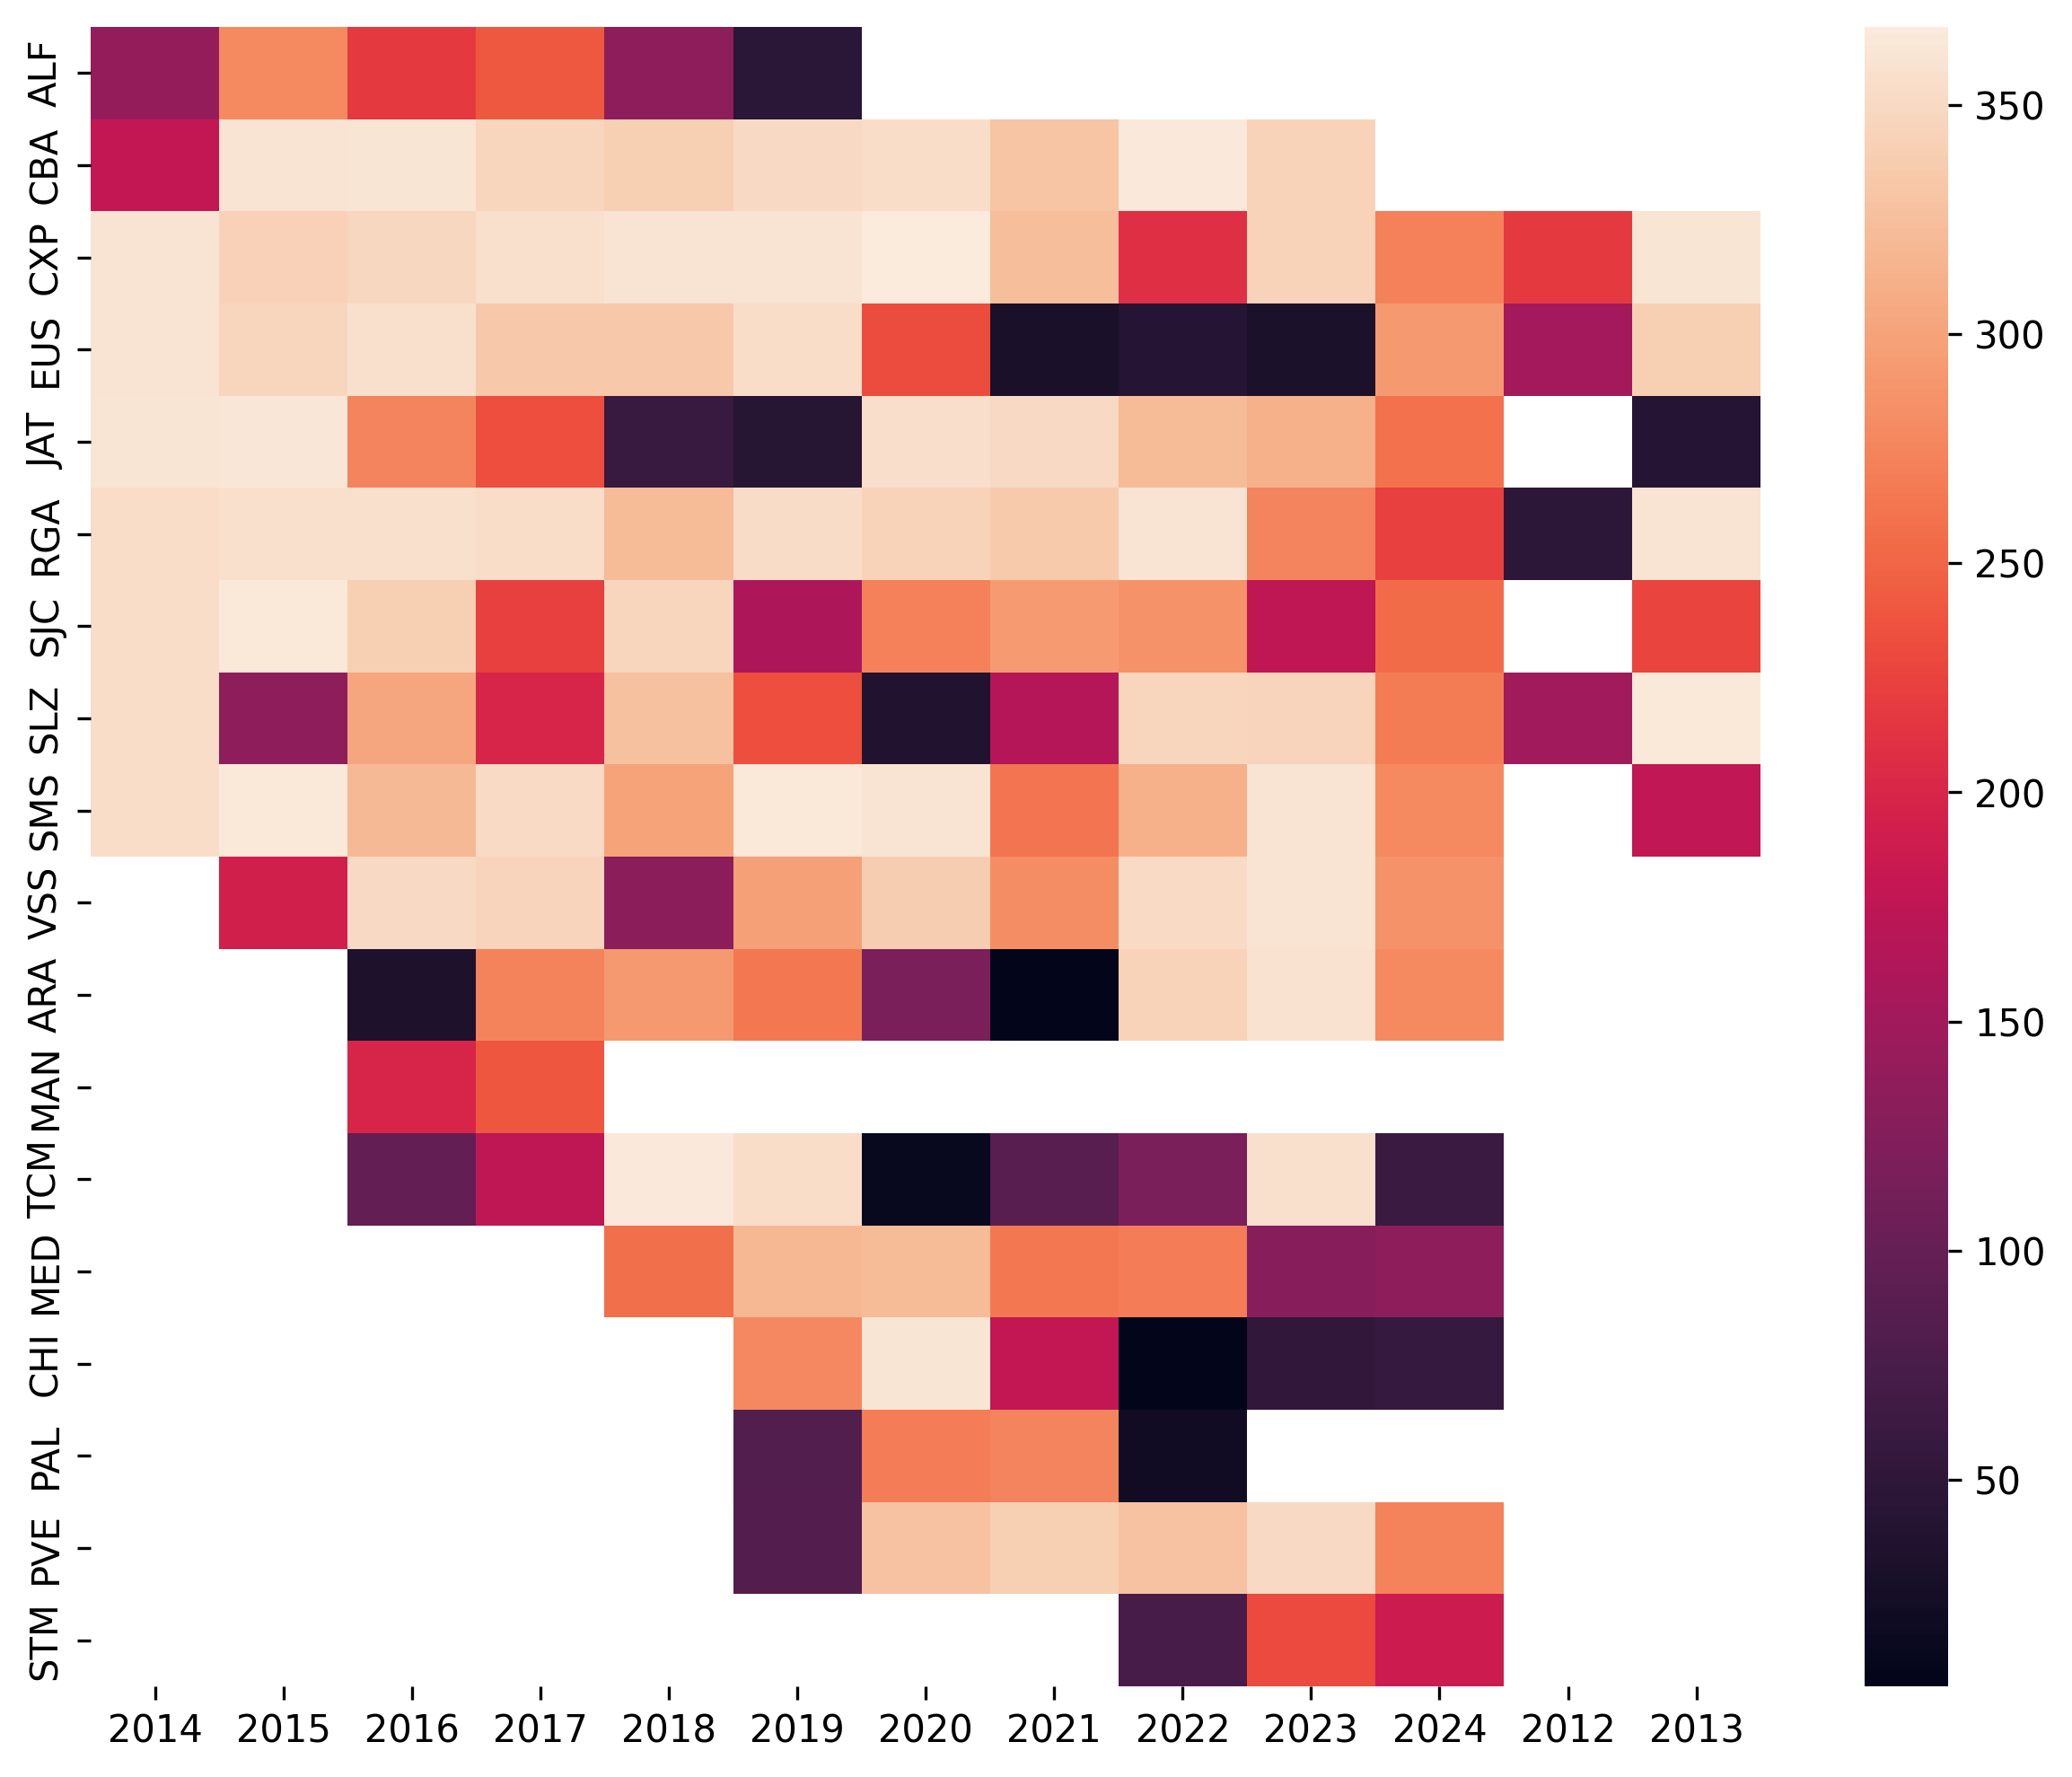

In [165]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
sns.heatmap(files, annot=False)
plt.savefig("heatmap.png")